### Milan's Air Quality Analysis

Milan faces significant air pollution challenges, particularly due to its location in the Po Plain, a region known for heavy industry and urbanization. The city frequently experiences high levels of PM2.5 (fine particulate matter), exceeding World Health Organization limits and leading to health concerns for residents. PM2.5 concentration is currently 2.2 times the World Health Organization annual PM2.5 guideline value. While Milan has implemented measures like traffic restrictions and investing in cleaner transportation, geographical factors and the concentration of industrial and agricultural activities continue to contribute to the problem. <br>
In this project I intend to delve deeper into this phenomenona and illustrate the following:
* Descriptive Analysis.
* Health & Policy Relevance.
* Seasonal & Temporal Insights.
* Forecasting Using Machine Learning.

In [33]:
# Importing necessarry libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Preparing data
milan = pd.read_csv('milan-air-pollution.csv', sep=';')
milan.columns = ["station_id", "date", "pollutant", "value"]
milan['date'] = pd.to_datetime(milan['date'], errors='coerce')
milan['value'] = pd.to_numeric(milan['value'], errors='coerce')
milan.to_csv('milan_air_pollution_cleaned.csv', index=False)
milan.tail(15000).to_csv('milan_air_pollution_sample.csv', index=False)

In [35]:
milan = pd.read_csv('milan_air_pollution_sample.csv')
# Counting missing values
missing_vals = milan.isnull().sum()
print(missing_vals)

station_id       0
date             0
pollutant        0
value         3142
dtype: int64


In [25]:
milan.head()

,station_id,date,pollutant,value
0,4,2023-03-10,PM25,17.0
1,5,2023-03-10,NO2,NaN
2,5,2023-03-10,O3,NaN
3,6,2023-03-10,C6H6,1.2
4,6,2023-03-10,CO_8h,0.8


In [26]:
# Replacing NaN values in the 'values' column with values' mean
milan = milan.assign(value=milan['value'].fillna(milan['value'].mean()))
milan['value'] = milan['value'].round(2)
milan.head()

,station_id,date,pollutant,value
0,4,2023-03-10,PM25,17.00
1,5,2023-03-10,NO2,38.63
2,5,2023-03-10,O3,38.63
3,6,2023-03-10,C6H6,1.20
4,6,2023-03-10,CO_8h,0.80


## Trend Analysis
The data is now clean to use. Before we start analyzing, let's go over each pollutant in our data and where it comes from:
* C₆H₆ (Benzene) - 
    Sources: Vehicle exhaust (especially petrol engines), industrial emissions (chemical plants, refineries), cigarette smoke, evaporation from gasoline and solvents.
* CO (Carbon Monoxide, often measured as 8-hour average, CO_8h) - 
    Sources: Incomplete combustion of fossil fuels (cars, trucks, motorcycles), residential heating (wood stoves, gas heaters), industrial processes
* NO₂ (Nitrogen Dioxide) - 
    Sources: Vehicle exhaust (diesel engines are major contributors), power plants and industrial combustion, natural sources (lightning, wildfires)
* O₃ (Ozone, ground-level) - 
    Sources: not emitted directly. It forms photochemically from reactions between NOx and VOCs in sunlight. High levels often occur in urban areas with lots of sunlight and vehicle emissions.
* PM₁₀ (Particulate Matter ≤10 µm) - 
    Sources: Dust from roads and construction, industrial emissions, vehicle exhaust (especially diesel), natural sources (soil dust, pollen)
* PM₂.₅ (Particulate Matter ≤2.5 µm) - 
    Sources: Combustion processes (vehicles, power plants, residential heating), secondary formation from gases like SO₂, NOx, and VOCs, wildfires
* SO₂ (Sulfur Dioxide) - 
    Sources: Burning of fossil fuels with sulfur (coal, oil, diesel), industrial processes (metal smelting, refineries), volcanic eruptions (natural source)<br>
**Now, let's illustrate an overview at our data and see how pollution levels change over time:**


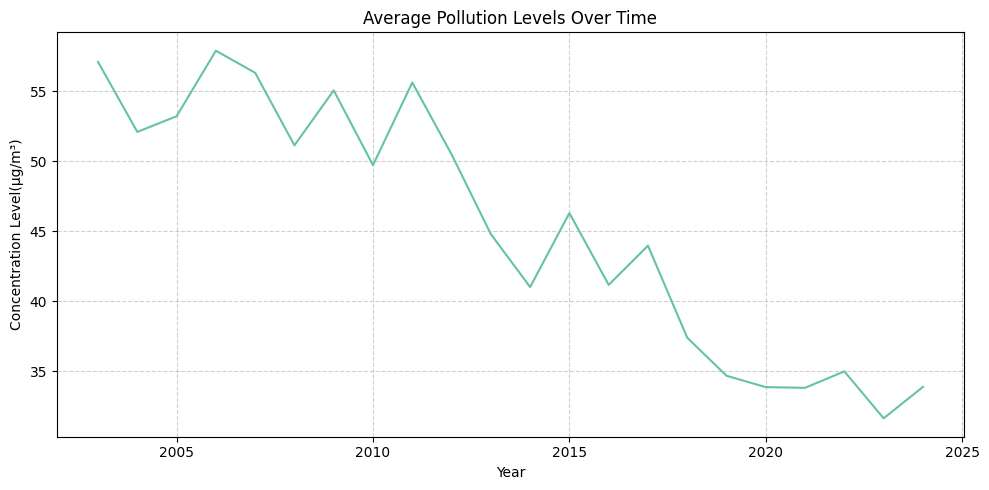

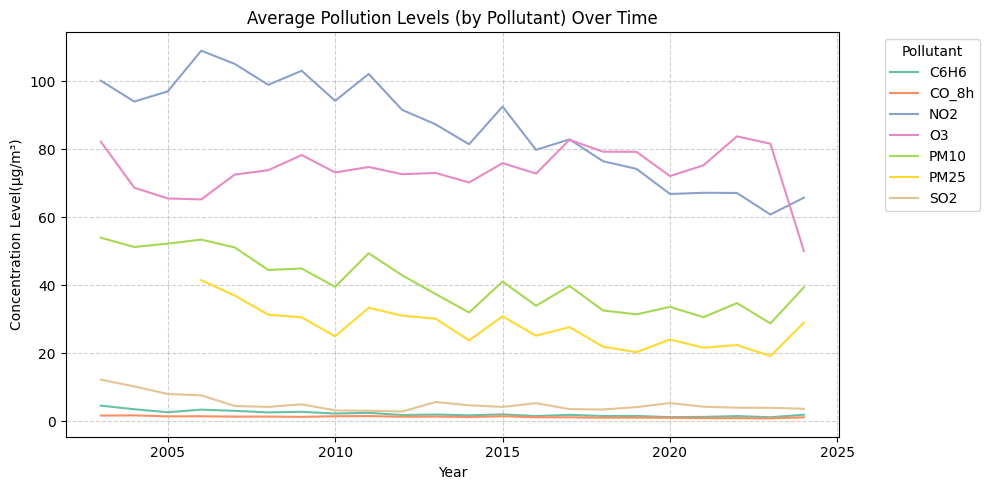

In [43]:
milan['year'] = milan['date'].dt.year
avgmilan = milan.groupby(['year'])['value'].mean().reset_index()
avg_by_pollutant = milan.groupby(['year', 'pollutant'])['value'].mean().reset_index()
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.lineplot(data=avgmilan, x='year', y='value')
plt.grid(alpha=0.6, linestyle='--')
plt.title("Average Pollution Levels Over Time")
plt.xlabel("Year")
plt.ylabel("Concentration Level(µg/m³)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_by_pollutant, x='year', y='value', hue='pollutant')
plt.grid(alpha=0.6, linestyle='--')
plt.title("Average Pollution Levels (by Pollutant) Over Time")
plt.xlabel("Year")
plt.ylabel("Concentration Level(µg/m³)")
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The annual average concentrations of pollutants in Milan show clear long-term improvements. NO₂, PM10, and PM2.5 have declined significantly since the early 2000s, reflecting the impact of stricter emission regulations, cleaner fuels, and reduced traffic during the COVID-19 lockdowns. Benzene (C₆H₆) and SO₂ have also nearly disappeared as major pollutants, thanks to industrial controls and fuel restrictions. However, O₃ levels remain relatively high and fluctuate across years, highlighting the persistent challenge of secondary pollutants that increase when NO₂ decreases. Overall, Milan’s air quality has improved substantially, but ozone and particulate matter remain important concerns for public health.

## Weekday Analysis
Weekly analysis is conducted to understand behavioral or traffic-related pollution dynamics. While analyzing pollution trends by weekday, I noticed that data for Saturday and Sunday is missing from the dataset. This absence could be due to gaps in data collection, sensor downtime, or reporting inconsistencies during weekends. As a result, the weekday analysis only reflects Monday through Friday. Although weekly analysis is important—since industrial activities follow a weekly rhythm and traffic emissions spike on weekdays—a detailed breakdown cannot be performed due to the missing weekend data. However, I will illustrate the levels of each pollutant on a weekly basis to analyze the range within which each pollutant falls and to assess whether those levels are environmentally healthy.

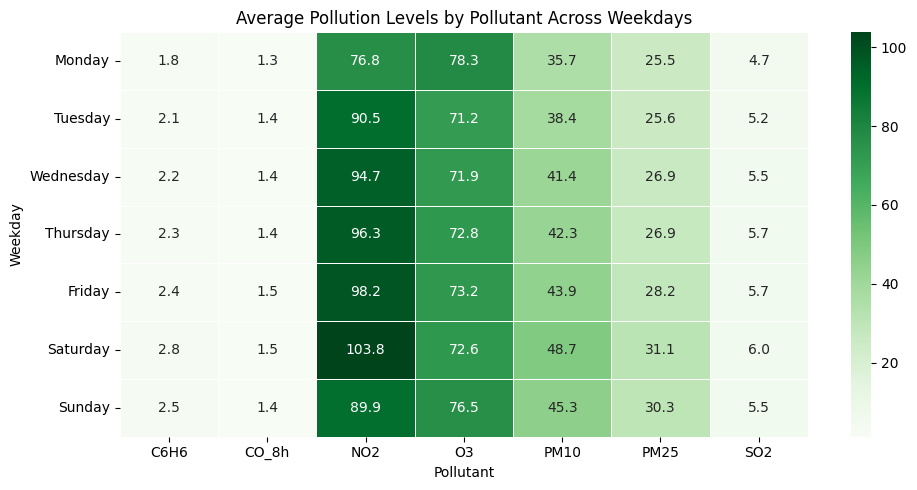

In [31]:
milan['weekday'] = milan['date'].dt.day_name()
weekday_avg = milan.groupby(['weekday', 'pollutant'])['value'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg['weekday'] = pd.Categorical(weekday_avg['weekday'], categories=weekday_order, ordered=True)
weekday_avg.sort_values('weekday', inplace=True)
heatmap_data = weekday_avg.pivot(index='weekday', columns='pollutant', values='value')
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Average Pollution Levels by Pollutant Across Weekdays")
plt.xlabel("Pollutant")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

Let's analyze this data against WHO 2021 Air Quality Guidelines:<br>
1. **C₆H₆ (Benzene)** *(Lower is Better)* - Range: 1.8 – 2.8 µg/m³, below EU annual limit (5 µg/m³).
2. **CO_8h** *(Safe)* - Range: 1.3 – 1.5 mg/m³, which is far below WHO guideline(4 mg/m³).
3. **NO₂** *(Unhealthy)* - Range: 76.8 – 103.8 µg/m³ - WHO daily guideline = 25 µg/m³(levels are 3–4x higher).
4. **O₃** *(Safe)* - Range: 71 – 78 µg/m³ - Below WHO limit(100 µg/m³).
5. **PM₁₀** *(Unhealthy)* - Range: 35.7 – 48.7 µg/m³ - WHO daily limit = 45 µg/m³(borderline or exceeded on Thu–Sun).
6. **PM₂.₅** *(Very Unhealthy)* - Range: 25.5 – 31.1 µg/m³ - WHO daily limit = 15 µg/m³(almost 2× higher every day).
7. **SO₂** *(Safe)* - Range: 4.7 – 6.0 µg/m³, below WHO 24h guideline (20 µg/m³).

## Seasonal Trend
**I am going to illustrate a lineplot for a clean overview of averages and a boxplot for a deeper dive into variability:**

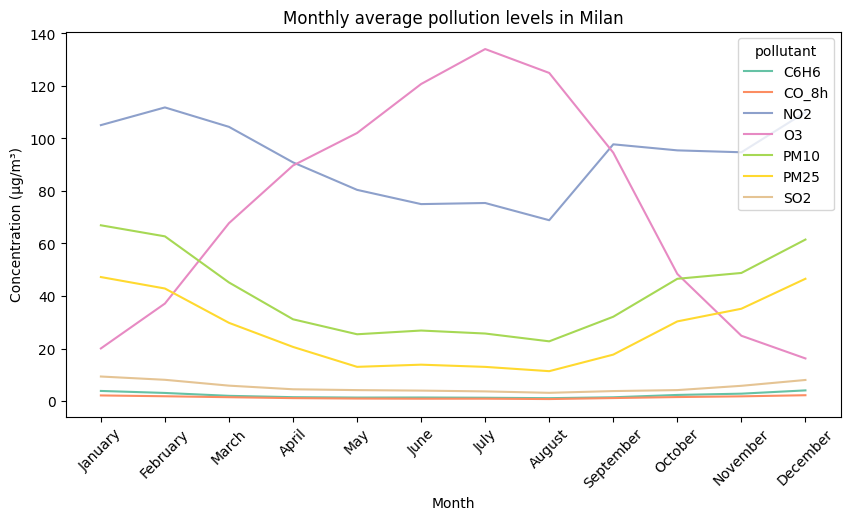

In [51]:
milan['month'] = milan['date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
milan['month'] = pd.Categorical(milan['month'], categories=month_order)
monthavg = milan.groupby(['month', 'pollutant'], observed=True)['value'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthavg, x='month', y='value', hue='pollutant')
plt.title("Monthly average pollution levels in Milan")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Concentration (µg/m³)")
plt.show()

As displayed in the plot, the levels of NO₂, PM₁₀ and PM₂.₅ dramatically decline throughout February to May, stay steady from May to August then begin to rise as autumn takes place. Which can easily be explained by the combination of increased pollution sources, such as greater demand for heating and personal vehicle use, and atmospheric conditions like temperature inversions, where a layer of warm air traps cold, polluted air near the ground.<br> Not a noticable change is seen when it comes to SO₂, C₆H₆, and CO_8h as they're low and steady throughout the entire year. <br> Ozone however starts at 20µg/m³ at the beginning of the year and hits its peak of approximately 140µg/m³ in July then proceeds to decline back to 20µg/m³ after that.